## Import Libraries

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

# Load Dataset

In [62]:
df = pd.read_csv('kc_house_data.csv')

# Initial Data Check

In [63]:
print(df.head())
print(df.info())
print(df.isnull().sum())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

# Drop irrelevant columns

In [64]:
df = df.drop(['id', 'date'], axis=1)

# Feature Engineering: Adding new features

In [65]:
df['house_age'] = 2025 - df['yr_built']
df['renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
df['total_bathrooms'] = df['bathrooms'] + df['half_bathrooms'] if 'half_bathrooms' in df.columns else df['bathrooms']

# Drop redundant columns if present

In [66]:
drop_cols = ['yr_built', 'yr_renovated']
for col in drop_cols:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)

# Correlation Heatmap

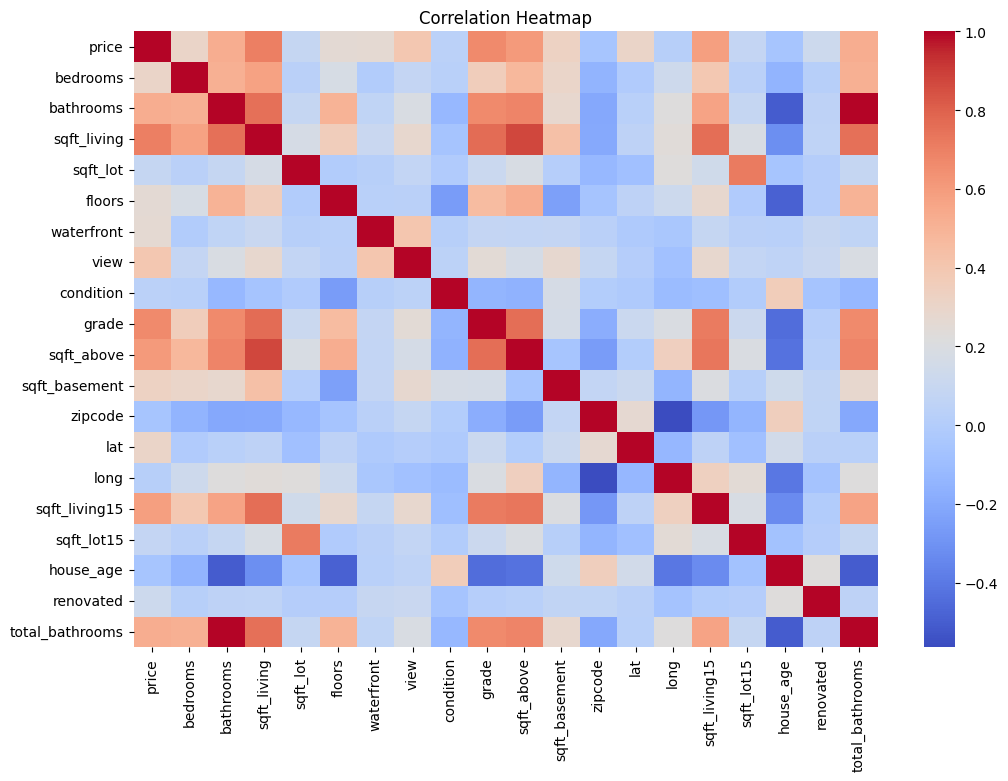

In [67]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Split Data

In [68]:
X = df.drop(['price'], axis=1)
y = df['price']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting Model

In [70]:
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=42)

# Predict

In [71]:
y_pred = model.predict(X_test)

# Evaluation

In [72]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [73]:
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Root Mean Squared Error (RMSE): 141668.31
R² Score: 0.8672


# Feature Importance

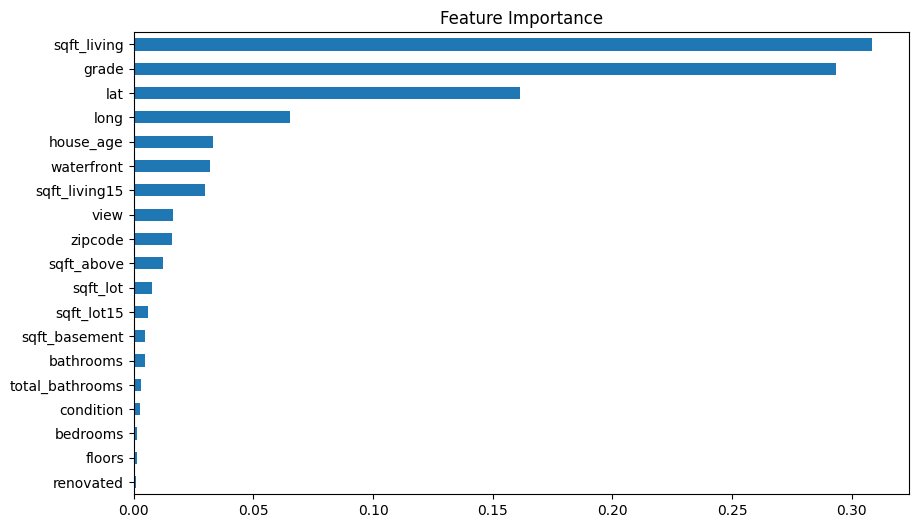

In [74]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title("Feature Importance")
plt.show()

#Interactive Prediction Function


In [80]:
def predict_house_price(model):
    print("Enter house details to predict price:")

    bedrooms = int(input("Number of Bedrooms: "))
    bathrooms = float(input("Number of Bathrooms: "))
    sqft_living = int(input("Living Area (sqft): "))
    sqft_lot = int(input("Lot Area (sqft): "))
    floors = float(input("Number of Floors: "))
    waterfront = int(input("Waterfront View (1=Yes, 0=No): "))
    view = int(input("View Rating (0-4): "))
    condition = int(input("Condition Rating (1-5): "))
    grade = int(input("Grade Rating (1-13): "))
    sqft_above = int(input("Sqft Above Ground: "))
    sqft_basement = int(input("Sqft Basement: "))
    lat = float(input("Latitude: "))
    long = float(input("Longitude: "))
    house_age = int(input("House Age (in years): "))
    renovated = int(input("Renovated (1=Yes, 0=No): "))
    sqft_living15 = int(input("Sqft Living of 15 nearest neighbors: "))
    sqft_lot15 = int(input("Sqft Lot of 15 nearest neighbors: "))
    zipcode = int(input("Zipcode: "))
    total_bathrooms = bathrooms # Assuming half bathrooms are included in the bathroom count

    # Prepare input
    input_data = pd.DataFrame([[
        bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view,
        condition, grade, sqft_above, sqft_basement, zipcode, lat, long, sqft_living15, sqft_lot15,
        house_age, renovated, total_bathrooms
    ]], columns=[
        'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
        'condition', 'grade', 'sqft_above', 'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
        'house_age', 'renovated', 'total_bathrooms'
    ])

    # Predict
    predicted_price = model.predict(input_data)[0]
    print(f"\nEstimated House Price: ${predicted_price:,.2f}")

# After model is trained

In [81]:
predict_house_price(model)

Enter house details to predict price:
Number of Bedrooms: 5
Number of Bathrooms: 2
Living Area (sqft): 5596
Lot Area (sqft): 4556
Number of Floors: 2
Waterfront View (1=Yes, 0=No): 0
View Rating (0-4): 0
Condition Rating (1-5): 5
Grade Rating (1-13): 0
Sqft Above Ground: 2
Sqft Basement: 2
Latitude: 3
Longitude: -122.35
House Age (in years): 0
Renovated (1=Yes, 0=No): 0
Sqft Living of 15 nearest neighbors: 45
Sqft Lot of 15 nearest neighbors: 4
Zipcode: 415409

Estimated House Price: $301,143.35
